# Subway Simulation

by Jacob Boydston and Calvin Pritchard

## Motivation
* The world's largest cities are dependent on subway networks
* Service distruptions interfere with personal lives, commercial and industrial productivity, and loss of revenue for the service operators
* Being able to model service disruptions is key when trying to develop solutions for disruption scenarios
* Modeling during the design process and before construction can also yield more efficient systems with lower operating costs, lower delays due to disruptions, and increased daily passenger capacity



## Subway System Components
* Subway systems consist of many interdependent components working together
    * Trains
    * Stations
    * Track sections
    * Passengers
* Each of these are easily represented by atomic models in the DEVS framework
    * The challenge in modeling these components are in managing the communications and defining the behavior
* For behavior and other model specific quantities, available Toronto Transit Commision data is used as a reference because it is openly available online
    * This includes train capacity, subway station layouts, times between stations, and passenger arrivals and departures per station per business day
* Unknown quantities include passenger board and depart times, specific delay times associated with a particular issue (breakdown, station closure, etc.)



## Typical Modeling Goals
* Optimized quantities when considering subway system design generally inlude operating costs and passenger capacity
    * More trains can carry more passengers, but can also increase train congestion on the network, slowing down service overall
    * More trains can also be more expensive to operate, but if enough passengers are riding, the additional revenues may yield more profit
    * Per train capacity can be increased, for example by adding an additional car, but this also increases operating costs and build costs due to the increased propulsion power required
* Simulations generally need to be designed to avoid deadlock
    * Deadlock occurs when no trains are able to move on the entire network
        * Consider an even where one train is broken down in each direction near each other
        * Over time, all trains will eventually be stuck behind the broken down trains and a deadlock condition occurs
    * Modeling subway networks can aid in the proper placement of rail switches that allow trains to bypass one another, hopefully preventing a deadlock condition


## Train Request Response Cycle
<img src="TrainPhaseTransition.png" alt="Train Phase Transition" style="width: 450px;"/>

## Scheduler Atomic Model
![SchedulerDiagram.png](SchedulerDiagram.png)

## Scheduler Logic
* The Scheduler is synonymous with the Coordinator atomic model
    * Is is essentially the brains of the system
* Train positions are bookkept internally to avoid further needs for communication through ports
    * Anytime actual information is needed, the ports are used, but the Train instances do not necessarily need to know where they are
        * The trains have an assumed order of states and it is the Scheduler's responsibility to ensure the trains only move when allowed and are located in the correct position
* If the trains needed to communicate directly with the stations, then every train would need to be coupled with every station
    * Instead the coupler routes messages appropriately based on its internal bookkeeping
* This means interactions between components can be handled at the Scheduler level

## Scheduler Scenario: Move Train into Station
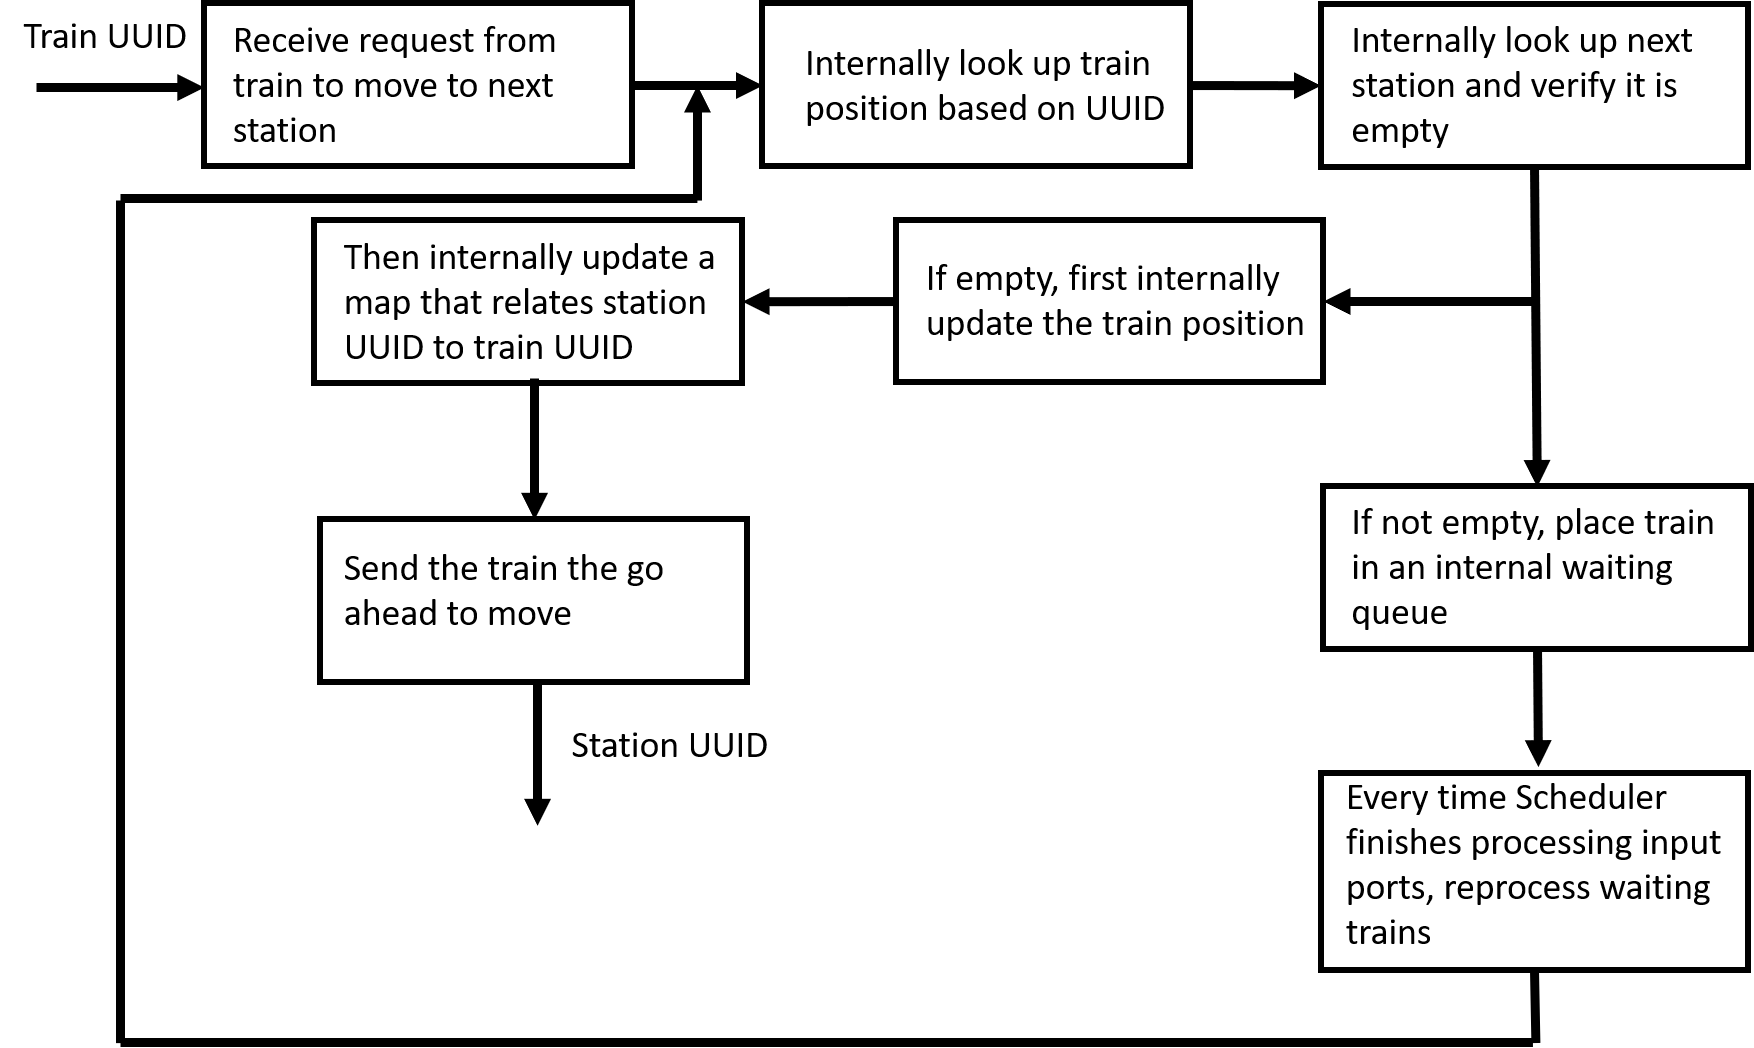

## Passenger Atomic Model
* Instantiated by the Station atomic model
* Only attributes are an origin and a destination
* Destination choice must be assumed by the simulation
    * Random choice
    * Random choice, but direction dependent
    * All passengers to one station
    * Correlated based on daily rider statistics from TTC
    * Cycle through a list of possible destinations

## DEVS Implementation
* Trains are grouped into a coupled atomic model
    * One group for each subway loop modeled
* Stations and tracks are ordered into a SubwayLoop atomic model
    * One subway loop instance for each direction on a subway line
    * Each direction has its own Station instance for a given stop
    * The track instances are shared between the directions, which provides interaction between the different directions and subway lines
* The grouped atomic models are primarily to simplify the coupling with the scheduler
